# 911 Calls Capstone Project
### AUTHOR :UTHMAN OLAGOKE
**Impoting necessary libraries**

In [1]:
%config IPcompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the data into a dataframe**

In [2]:
df=pd.read_csv('911.csv')

**Checking information about the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Checking the head of the dataframe**

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


##### To get the top 5 zipcodes for 911 calls

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

##### To get  the top 5 townships (twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

##### To check the number of titles that are unique

In [8]:
df['title'].nunique()

110

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **
##### To create a new column called reason

In [9]:
df['title'][0].split(':')[0]

'EMS'

In [10]:
df['reason']=df['title'].apply(lambda x:x[:].split(':')[0])

In [11]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

##### The most common Reason for a 911 call 

In [12]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

##### Using seaborn to create a countplot of 911 calls by Reason. 

<AxesSubplot:xlabel='reason', ylabel='count'>

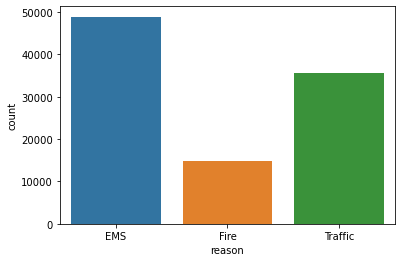

In [13]:
sns.countplot(data=df,x='reason')

##### Checking data type  of the objects in the timeStamp column

In [14]:
type(df['timeStamp'][0])


str

##### Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

##### using  .apply() to create 3 new columns called Hour, Month, and Day of Week,based off of the timeStamp column.

In [16]:
df['timeStamp'][0].hour

17

In [17]:
df['hours']=df['timeStamp'].apply(lambda x:x.hour)

In [18]:
df['hours']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: hours, Length: 99492, dtype: int64

In [19]:
df['Months']=df['timeStamp'].apply(lambda x:x.month)

In [20]:
df['Months']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Months, Length: 99492, dtype: int64

#####  Using .map( ) to map days of the weeks to abbreviated days 

In [21]:

df['weeks']=df['timeStamp'].apply(lambda x:x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['weeks']=df['weeks'].map(dmap)

In [23]:
df['weeks']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: weeks, Length: 99492, dtype: object

In [24]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hours,Months,weeks
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


##### Creating a seaborn countplot of weeks with hue based on reason

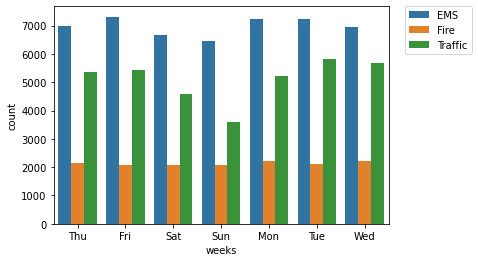

In [25]:
sns.countplot(x='weeks',data=df,hue=df['reason'])
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

##### Creating a seaborn countplot of month with hue based on reasons

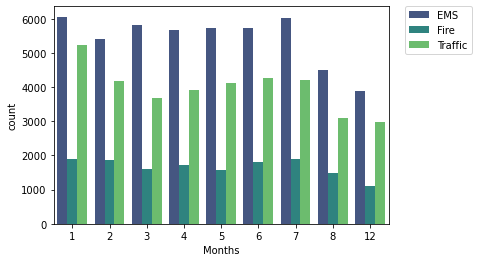

In [26]:
sns.countplot(x='Months',data=df,hue='reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

##### Grouping the data by the months

In [27]:
dfm=df.groupby('Months').count()

In [28]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hours,Months,weeks
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [29]:
dfm

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hours,weeks
Months,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


##### creating a simple plot off of the new dataframe indicating the count of calls per month. 


<AxesSubplot:xlabel='Months'>

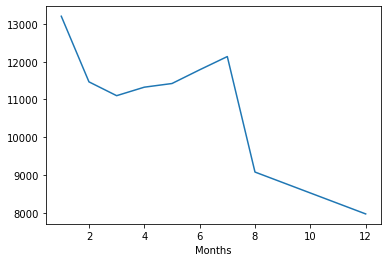

In [30]:
dfm['title'].plot()

No handles with labels found to put in legend.


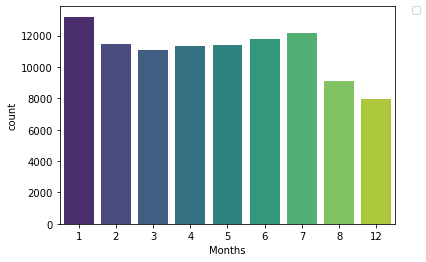

In [31]:
sns.countplot(x='Months',data=df ,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [32]:
dfm.reset_index()

,Months,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hours,weeks
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


##### using seaborn's lmplot() to create a linear fit on the number of calls per month. 

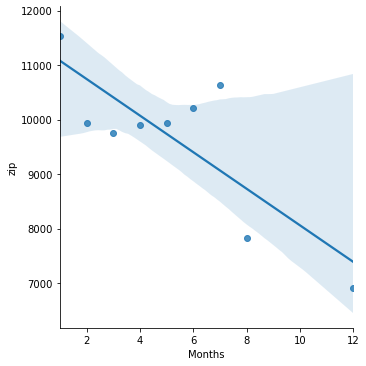

In [33]:
sns.lmplot(x='Months',y='zip',data=dfm.reset_index())

##### Creating a new column called 'Date' that contains the date from the timeStamp column. using  .apply() and  the .date() method. 

In [34]:
df['timeStamp'][0].date()

datetime.date(2015, 12, 10)

In [35]:
df['date']=df['timeStamp'].apply(lambda x:x.date())

In [36]:
df['date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

#####  using groupby on the  Date column with the count() aggregate to create a plot of counts of 911 calls.

In [37]:
df.groupby('date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hours,Months,weeks
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


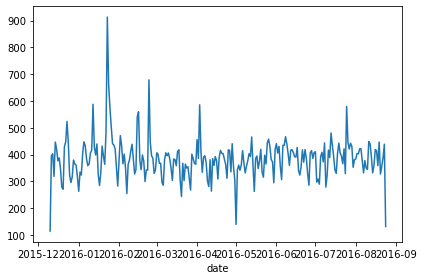

In [38]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

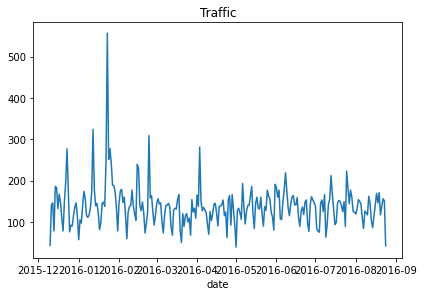

In [39]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')
#For Traffic

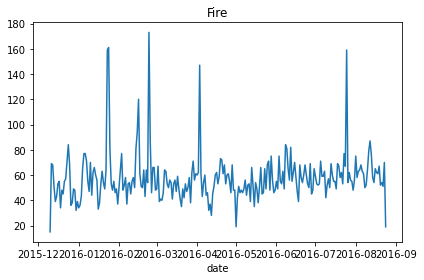

In [40]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()
#For Fire 

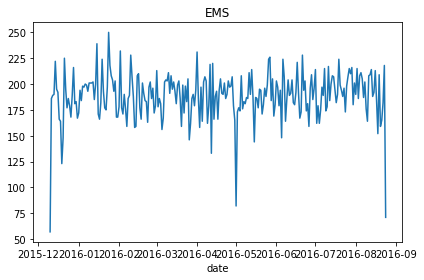

In [41]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()
#For EMS

##### creating  heatmaps with seaborn and our data. Restructuring  the dataframe so that the columns become the Hours and the Index becomes the Day of the Week,using [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. 

In [54]:
dayhour=df.groupby(by=['weeks','hours']).count()['reason'].unstack()

<AxesSubplot:xlabel='hours', ylabel='weeks'>

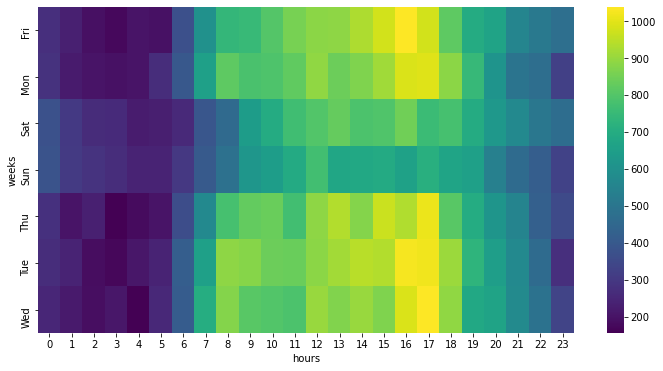

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')


##### creating a clustermap using the Data. 

<Figure size 864x432 with 0 Axes>

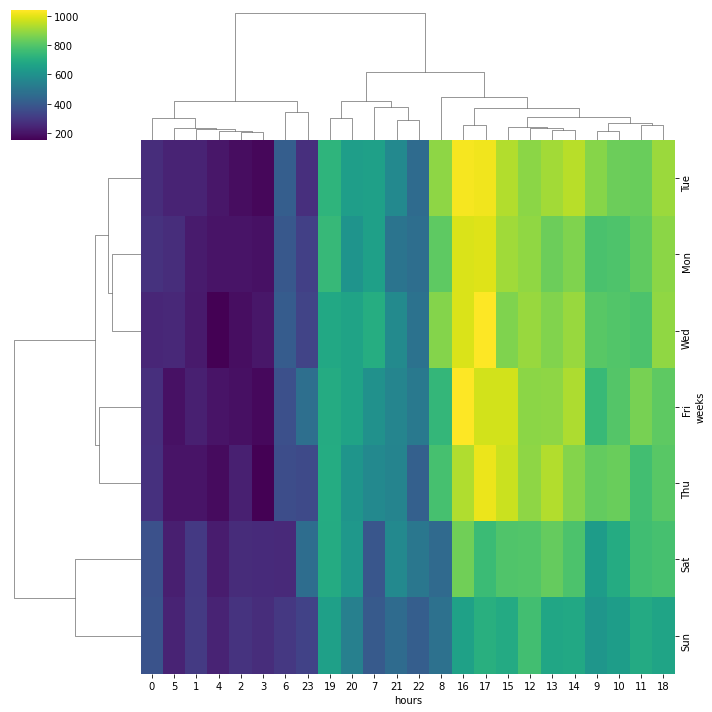

In [63]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour,cmap='viridis')

##### Doing the same with groupby the months

In [71]:
daymonth=df.groupby(by=['weeks','Months']).count()['reason'].unstack()
daymonth.head(5)

<AxesSubplot:xlabel='weeks', ylabel='Months'>

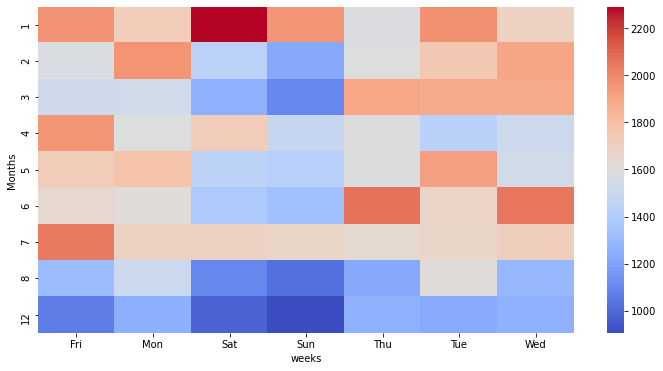

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby(by=['Months','weeks']).count()['reason'].unstack(),cmap='coolwarm')

<AxesSubplot:xlabel='Months', ylabel='weeks'>

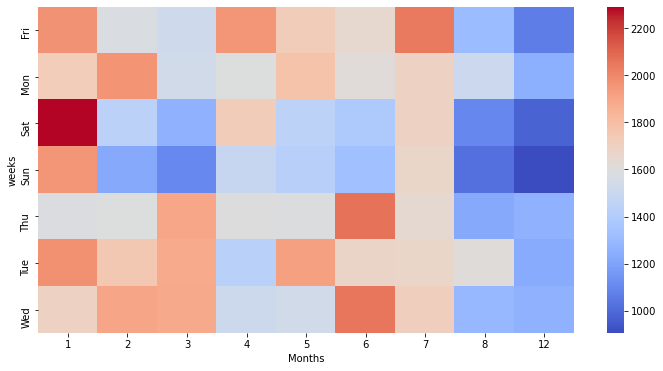

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='coolwarm')

<Figure size 864x432 with 0 Axes>

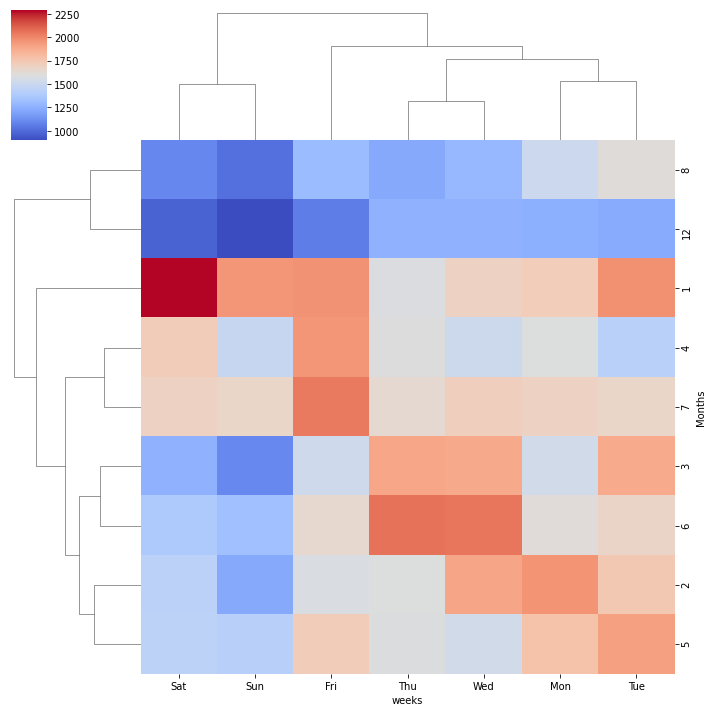

In [70]:
plt.figure(figsize=(12,6))
sns.clustermap(daymonth,cmap='coolwarm')


# Thank You!